In [ ]:
!pip install nibabel numpy matplotlib albumentations segmentation-models-pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!mkdir -p ~/.kaggle
!echo '{"username":"ragingthunder009","key":"4b46e2d7200ffa1280f127aec9eee5fd"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d dschettler8845/brats-2021-task1
!unzip brats-2021-task1.zip -d /content/BraTS2021

Dataset URL: https://www.kaggle.com/datasets/dschettler8845/brats-2021-task1
License(s): copyright-authors
100% 12.3G/12.3G [01:59<00:00, 180MB/s]
100% 12.3G/12.3G [02:00<00:00, 110MB/s]
Archive:  brats-2021-task1.zip
  inflating: /content/BraTS2021/BraTS2021_00495.tar  
  inflating: /content/BraTS2021/BraTS2021_00621.tar  
  inflating: /content/BraTS2021/BraTS2021_Training_Data.tar  


In [ ]:
!find /content/BraTS2021/ -name "*.tar" -exec tar -xvf {} -C /content/BraTS2021/ \;

Streaming output truncated to the last 5000 lines.
./BraTS2021_00590/BraTS2021_00590_t1ce.nii.gz
./BraTS2021_00590/BraTS2021_00590_t2.nii.gz
./BraTS2021_00591/
./BraTS2021_00591/BraTS2021_00591_flair.nii.gz
./BraTS2021_00591/BraTS2021_00591_seg.nii.gz
./BraTS2021_00591/BraTS2021_00591_t1.nii.gz
./BraTS2021_00591/BraTS2021_00591_t1ce.nii.gz
./BraTS2021_00591/BraTS2021_00591_t2.nii.gz
./BraTS2021_00593/
./BraTS2021_00593/BraTS2021_00593_flair.nii.gz
./BraTS2021_00593/BraTS2021_00593_seg.nii.gz
./BraTS2021_00593/BraTS2021_00593_t1.nii.gz
./BraTS2021_00593/BraTS2021_00593_t1ce.nii.gz
./BraTS2021_00593/BraTS2021_00593_t2.nii.gz
./BraTS2021_00594/
./BraTS2021_00594/BraTS2021_00594_flair.nii.gz
./BraTS2021_00594/BraTS2021_00594_seg.nii.gz
./BraTS2021_00594/BraTS2021_00594_t1.nii.gz
./BraTS2021_00594/BraTS2021_00594_t1ce.nii.gz
./BraTS2021_00594/BraTS2021_00594_t2.nii.gz
./BraTS2021_00596/
./BraTS2021_00596/BraTS2021_00596_flair.nii.gz
./BraTS2021_00596/BraTS2021_00596_seg.nii.gz
./BraTS2021_0

In [ ]:
## Exploratory Data Analysis

In [ ]:
import os
data_path = "./BraTS2021"
print("Number of Patients:", len(os.listdir(data_path)))

Number of Patients: 1265


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## converting a nii.gz file to a numpy array
def load_niigz(file_path):
    niigz_image = nib.load(file_path)
    return niigz_image.get_fdata()

In [ ]:
def MRI_Slices_visual(patient_folder):
   '''
   Plot different MRI modalities and corresponding segmentation mask.
   '''
   modalities = {
       "T1": os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_t1.nii.gz"),
       "T1ce": os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_t1ce.nii.gz"),
       "T2": os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_t2.nii.gz"),
       "FLAIR": os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_flair.nii.gz"),
       "Segmentation Mask":  os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_seg.nii.gz")
   }


   ## Load the images (converting them to numpy array and storing as key value pairs):
   imgs = {mod: load_niigz(path) for mod, path in modalities.items()}

   ## Select middle slice for visualization
   slice_idx = imgs['T1'].shape[2] // 2


   ## Plot MRI Modalities
   fig, axes = plt.subplots(1, 5, figsize = (20,5))
   for i, (modality, img) in enumerate(imgs.items()):
      axes[i].imshow(img[:, :, slice_idx], cmap= 'gray' if modality != 'Segmentation Mask' else 'jet')
      axes[i].set_title(modality)
      axes[i].axis('off')

   plt.show()

In [ ]:
## visualize nii.gz ---> numpy array

patient_sample = './BraTS2021/BraTS2021_00000'
modal_name = 't2'
sample_arr = load_niigz(os.path.join(patient_sample, f"BraTS2021_00000_{modal_name}.nii.gz"))

print(sample_arr.shape)

(240, 240, 155)


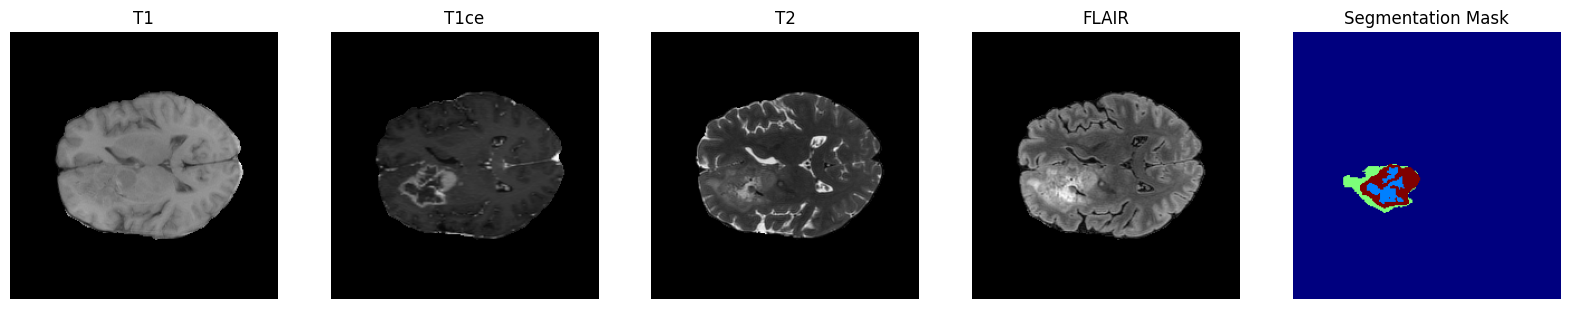

In [ ]:
## Visualize sample data of a patient

MRI_Slices_visual(patient_folder = patient_sample)

In [ ]:
'''
Checking for null values
- any patient folder missing any of the modalities.
- do any of the nii.gz files contains all zeros.
- are there any Nan values inside the 3D image array.
'''


def check_missing_modalities(data_path):
    required_modalities = ['t1.nii.gz', 't1ce.nii.gz', 't2.nii.gz', 'flair.nii.gz', 'seg.nii.gz']

    missing_files = []

    #loop through all the patients
    for patient in sorted(os.listdir(data_path)):

        # extract patient folder path
        path_xi = os.path.join(data_path, patient)

        # get inside each patient folder and check for missing modalities
        if os.path.isdir(path_xi):
           for modality in required_modalities:
               if not os.path.exists(os.path.join(path_xi, f"{patient}_{modality}")):
                  missing_files.append(f"{path_xi}/{modality}")


    if missing_files:
          print('Missing files found !!')
          for f in missing_files:
            print(f)
    else:
          print('No Missing files found !!')



def check_full_null_pixel_values(data_path):

    empty_images = []

    for patient in sorted(os.listdir(data_path)):

        # extract patient folder path
        path_xi = os.path.join(data_path, patient)

        if os.path.isdir(path_xi):
           for file in os.listdir(path_xi):
               if file.endswith('.nii.gz'):
                  img_path = os.path.join(path_xi, file)
                  img_data = nib.load(img_path).get_fdata()

                  if np.all(img_data == 0):
                     empty_images.append(img_path)


    if empty_images:
       print('Empty Scans Found:')
       for f in empty_images:
            print(f)
    else:
       print('No empty scans detected')




def check_NaN_values(data_path):
    nan_files = []

    for patient in sorted(os.listdir(data_path)):

        path_xi = os.path.join(data_path, patient)

        if os.path.isdir(path_xi):
           for file in os.listdir(path_xi):
               if file.endswith('.nii.gz'):
                  img_path = os.path.join(path_xi, file)
                  img_data = nib.load(img_path).get_fdata()

                  if np.isnan(img_data).any():
                      nan_files.append(img_path)


    if nan_files:
      print('Nan files exists')
      for k in nan_files:
        print(k)

    else:
      print('No Nan values detected')

In [ ]:
#check_missing_modalities(data_path = data_path)
#check_full_null_pixel_values(data_path = data_path)
#check_NaN_values(data_path = data_path)

In [ ]:
## Plot histograms of voxel intensities

def plot_intensity_histograms(patient_folder):

    modalities = ["t1", "t1ce", "t2", "flair"]
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for i, modality in enumerate(modalities):
        file_path = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_{modality}.nii.gz")
        image = nib.load(file_path).get_fdata()

        image_values = image.flatten()
        image_values = image_values[image_values > np.percentile(image_values, 0.5)]
        image_values = image_values[image_values < np.percentile(image_values, 99.5)]

        # Plot histogram with normalized frequencies
        axes[i].hist(image_values, bins=100, color='blue', alpha=0.7, density=True)
        axes[i].set_title(f"Histogram of {modality.upper()} Intensities")
        axes[i].set_xlabel("Intensity")
        axes[i].set_ylabel("Normalized Frequency")
        axes[i].set_yscale("log")

    plt.show()


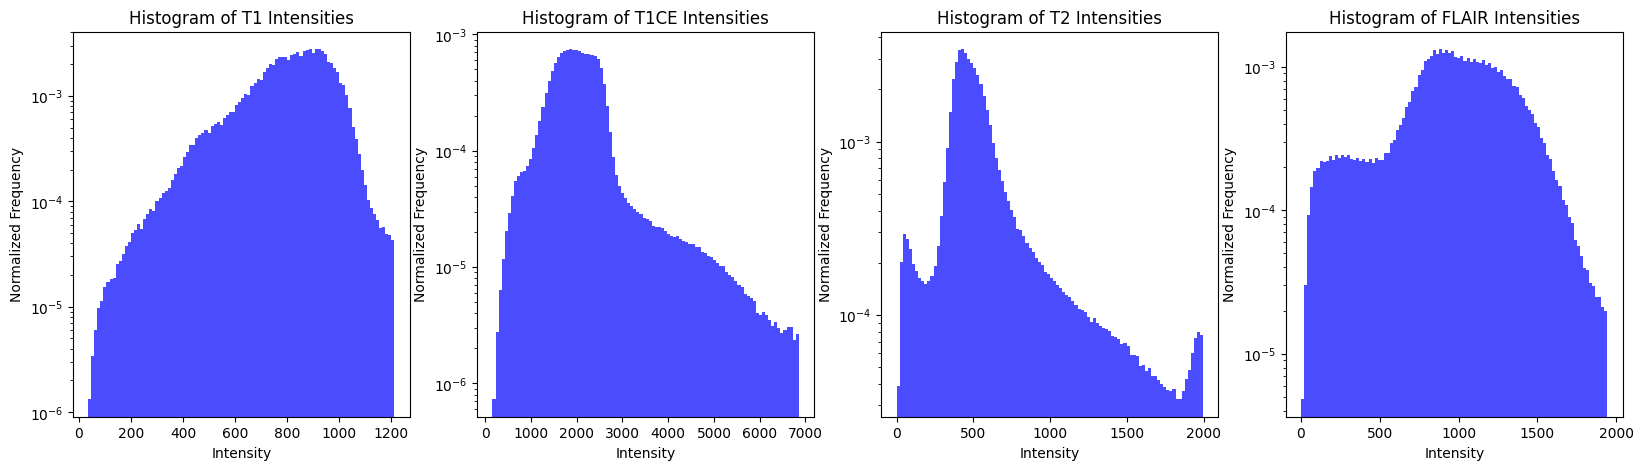

In [ ]:
patient_example = "/content/BraTS2021/BraTS2021_00000"
plot_intensity_histograms(patient_example)

In [ ]:
## Check class imbalance by counting voxel labels from seg file

def count_voxel_labels(patient_folder):
   # we have 4 classes

   path_xi = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_seg.nii.gz")
   segmentation = nib.load(path_xi).get_fdata()

   unique_labels, counts = np.unique(segmentation, return_counts = True)
   label_counts = dict(zip(unique_labels, counts))

   print(f"Voxel counts for {os.path.basename(patient_folder)}:")

   for label, count in label_counts.items():
       print(f"Label {int(label)}: {count} voxels")

In [ ]:
count_voxel_labels(patient_example)

Voxel counts for BraTS2021_00000:
Label 0: 8870695 voxels
Label 1: 11738 voxels
Label 2: 12836 voxels
Label 4: 32731 voxels


In [ ]:
## Overlay segmentation masks on MRI Slices

def overlay_segmentation(patient_folder, slice_idx=None):

    flair_path = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_flair.nii.gz")
    seg_path = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_seg.nii.gz")

    flair_img = nib.load(flair_path).get_fdata()
    seg_img = nib.load(seg_path).get_fdata()

    if slice_idx is None:
        slice_idx = flair_img.shape[2] // 2

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(flair_img[:, :, slice_idx], cmap='gray')
    ax.imshow(seg_img[:, :, slice_idx], cmap='jet', alpha=0.4)
    ax.set_title(f"Overlay of Segmentation on FLAIR (Slice {slice_idx})")
    ax.axis("off")

    plt.show()

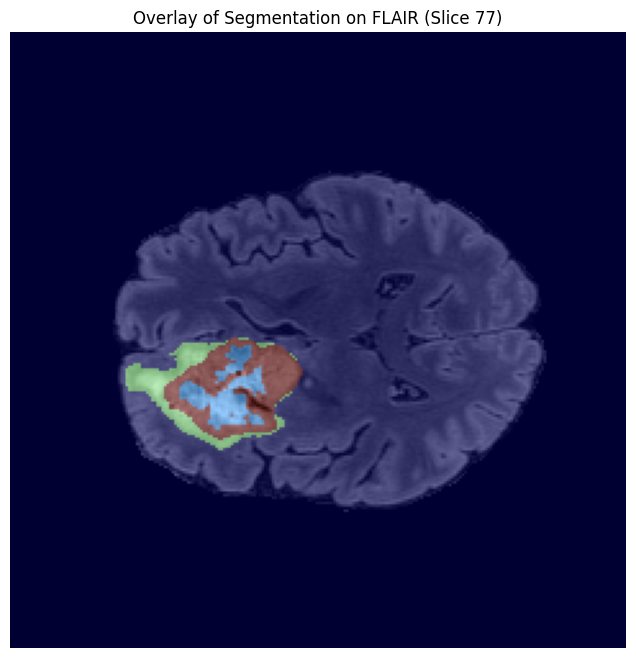

In [ ]:
overlay_segmentation(patient_example)

In [ ]:
## Compute tumor volumes

def compute_tumor_volumes(patient_folder, voxel_volume=1):

    seg_path = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_seg.nii.gz")
    seg_img = nib.load(seg_path).get_fdata()

    unique_labels, counts = np.unique(seg_img, return_counts=True)

    tumor_volumes = {label: count * voxel_volume for label, count in zip(unique_labels, counts) if label != 0}

    print(f"Tumor Volumes (in voxel units) for {os.path.basename(patient_folder)}:")
    for label, volume in tumor_volumes.items():
        print(f"Label {int(label)}: {volume} mm³")

In [ ]:
compute_tumor_volumes(patient_example)

Tumor Volumes (in voxel units) for BraTS2021_00000:
Label 1: 11738 mm³
Label 2: 12836 mm³
Label 4: 32731 mm³


In [ ]:
## 3D visualization of the tumor

import plotly.graph_objects as go


def visualize_3d_segmentation(patient_folder):
    """Render a 3D visualization of tumor segmentation using Plotly."""

    seg_path = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}_seg.nii.gz")
    seg_img = nib.load(seg_path).get_fdata()

    # Get tumor voxel positions
    x, y, z = np.where(seg_img > 0)

    # Create a scatter plot for the tumor segmentation
    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=2,  # Adjust point size
            color=z,  # Color by depth
            colorscale='Reds',  # Use red color scale for tumor
            opacity=0.5
        )
    )])

    fig.update_layout(title="3D Tumor Segmentation", scene=dict(
        xaxis_title="X", yaxis_title="Y", zaxis_title="Z"
    ))

    fig.show()

# Example usage
patient_example = "/content/BraTS2021/BraTS2021_00000"
visualize_3d_segmentation(patient_example)



In [ ]:
## Phase 2: Using SMP based transfer learning to obtain initial results

In [ ]:
!pip install segmentation-models-pytorch

In [ ]:
## SMP Initialization code

import segmentation_models_pytorch as smp

transfer_model = smp.Unet(
    encoder_name = "resnet50",
    encoder_weights = "imagenet",
    in_channels = 4,
    classes = 4
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 165MB/s]


In [ ]:
## Preprocessing 30% data to fit transfer learning model

'''
Steps:
1. Load/Sample only 30% data
2.
'''

import random
from glob import glob
import torchvision.transforms as trfs
import torch.nn.functional as F
import torch


# glob is used to find all directories inside a folder using asterisk *
patient_directories = sorted(glob(os.path.join(data_path, "*")))

# select 30% dataset randomly
subset_size = int(0.2 * len(patient_directories))
#selected_patients = random.sample(patient_directories, subset_size)
selected_patients = patient_directories[:subset_size]
print(selected_patients)

# modalities

modalities = ["t1", "t1ce", "t2", "flair"]

imagenet_normalize = trfs.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225]
)


['./BraTS2021/BraTS2021_00000', './BraTS2021/BraTS2021_00002', './BraTS2021/BraTS2021_00003', './BraTS2021/BraTS2021_00005', './BraTS2021/BraTS2021_00006', './BraTS2021/BraTS2021_00008', './BraTS2021/BraTS2021_00009', './BraTS2021/BraTS2021_00011', './BraTS2021/BraTS2021_00012', './BraTS2021/BraTS2021_00014', './BraTS2021/BraTS2021_00016', './BraTS2021/BraTS2021_00017', './BraTS2021/BraTS2021_00018', './BraTS2021/BraTS2021_00019', './BraTS2021/BraTS2021_00020', './BraTS2021/BraTS2021_00021', './BraTS2021/BraTS2021_00022', './BraTS2021/BraTS2021_00024', './BraTS2021/BraTS2021_00025', './BraTS2021/BraTS2021_00026', './BraTS2021/BraTS2021_00028', './BraTS2021/BraTS2021_00030', './BraTS2021/BraTS2021_00031', './BraTS2021/BraTS2021_00032', './BraTS2021/BraTS2021_00033', './BraTS2021/BraTS2021_00035', './BraTS2021/BraTS2021_00036', './BraTS2021/BraTS2021_00043', './BraTS2021/BraTS2021_00044', './BraTS2021/BraTS2021_00045', './BraTS2021/BraTS2021_00046', './BraTS2021/BraTS2021_00048', './BraT

In [ ]:
def preprocessing_fxn_single_patient(patient_path, target_size=(256, 256, 155)):


  if not os.path.isdir(patient_path):
    return None


  images = []

  for mod in modalities:

      patient_id = os.path.basename(patient_path)
      file_path = os.path.join(patient_path, f"BraTS2021_{patient_id[-5:]}_{mod}.nii.gz")



      image = nib.load(file_path).get_fdata()

      image = torch.tensor(image, dtype = torch.float32)

      image = F.interpolate(image.unsqueeze(0).unsqueeze(0), size = target_size, mode = 'trilinear', align_corners = False).squeeze(0).squeeze(0)  # Modified: Changed mode to 'trilinear' for 3D interpolation
      image = (image - image.min()) / (image.max() - image.min())
      images.append(image)


  images = torch.stack(images)

  mean = images.mean()
  std = images.std()

  images = (images - mean) / std


  return images

In [ ]:

preprocesses_data = []



for patient in selected_patients:
  processed_imgs = preprocessing_fxn_single_patient(patient)
  preprocesses_data.append(processed_imgs)



preprocessed_data = torch.stack(preprocesses_data)


print(preprocessed_data.shape)

In [ ]:
import segmentation_models_pytorch as SMP
import torch.nn as nn
import torch.optim as optim


model = SMP.Unet(
    encoder_name = "resnet34",
    encoder_weights = "imagenet",
    in_channels = 4,
    classes = 4
)


loss_fxn = SMP.losses.DiceLoss(mode = 'multiclass')
optimizer = optim.Adam(model.parameters(), lr = 1e-4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(model)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class BraTSDataset(Dataset):
  def __init__(self, data, targets):
    self.images = images
    self.masks = masks

  def __len__(self):
    return len(self.images)

  def __getitem(self, idx):
    image = self.images[idx]
    mask = self.masks[idx]
    return torch.tensor(image, dtype = torch.float32), torch.tensor(mask, dtype = torch.long)

images = torch.load('preprocessed_images.pt')
masks = torch.Load('preprocessed_masks.pt')

dataset = BraTSDataset(images, masks)
train_loader = DataLoader(dataset, batch_size = 4, shuffle = True, num_workers = 2)


for img_batch, mask_batch in train_loader:
    print(img_batch.shape, mask_batch.shape)
    break;






In [ ]:
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

loss_fxn = SMP.losses.DiceLoss(mode = 'multiclass')
optimizer = optim.Adam(model.parameters(), lr = 1e-4)

num_epochs = 10
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0

  loop = tqdm(train_loader, desc = f"epoch {epoch+1}/{num_epochs}")

  for images, masks in loop:
    images = images.to(device)
    masks = masks.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fxn(outputs, masks)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    loop.set_postfix(loss = loss.item())

  print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

torch.save(model.state_dict(), 'transfer_learning_model.pth')